In [1]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager()                     

slice_name="project" 
slice = fablib.get_slice(name=slice_name)

In [17]:
sender_packets="packet_send_times.csv"
slice.get_node("sender").download_file("/home/fabric/work/Project/packet_send_times.csv", "/home/ubuntu/" +sender_packets )

In [18]:
receiver_packets="packet_receive_times.csv"
slice.get_node("receiver").download_file("/home/fabric/work/Project/packet_receive_times.csv", "/home/ubuntu/" +receiver_packets )

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

send_times = pd.read_csv("/home/fabric/work/Project/packet_send_times.csv")

receive_times = pd.read_csv("/home/fabric/work/Project/packet_receive_times.csv")

latency = []
# Calculate latency (difference between receive and send times)
# latency = ((receive_times.ReceiveTime -send_times[:len(receive_times)].SendTime)*1000
for (idx_send, send_row), (idx_recv, receive_row) in zip(send_times.iterrows(), receive_times.iterrows()):
    if(send_row['PacketNumber'] == receive_row['PacketNumber']):
        latency.append((send_row['PacketNumber'], (receive_row['ReceiveTime'] - send_row['SendTime'])*1000))
    else:
        latency.append(send_row['PacketNumber'], 0)
        idx_recv-=1

# Save latency to a new CSV file
csv_file_path = '/home/fabric/work/Project/latency.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['PacketNumber','Latency'])  # Write header
    for number,latency_value in latency:
        #latency_value.values[0].flatten()
        writer.writerow([number,latency_value])


states = pd.DataFrame({ 'start': send_times.PacketNumber[:-2].values,
                        'end':   send_times.PacketNumber[1:-1].values})

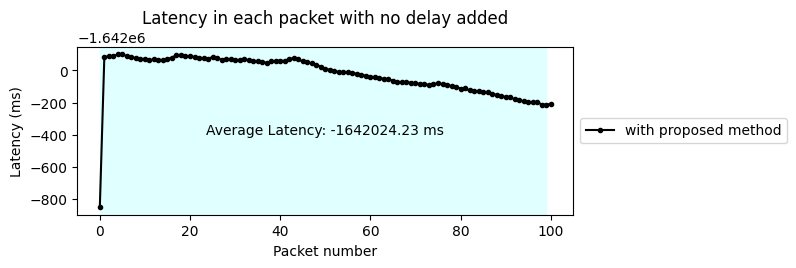

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Load latency data
latency = pd.read_csv("/home/fabric/work/Project/latency.csv")
latency_basic = pd.read_csv("/home/fabric/work/Project/latency_basic.csv")

# Plot first subplot
plt.subplot(211)
for index, s in states.iterrows():
    plt.axvspan(s['start'], s['end'],  color='lightcyan', alpha=1) 

average_latency = latency.Latency.mean()
plt.annotate(f'Average Latency: {average_latency:.2f} ms', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center')

# Plot latency data
plt.plot(latency.PacketNumber, latency.Latency, 'ko-', markersize=3, label ='with proposed method')
# plt.plot(latency_basic.PacketNumber, latency_basic.Latency, 'b--', markersize=1 ,label= 'without proposed method')

plt.title("Latency in each packet with no delay added");
plt.ylabel("Latency (ms)")
plt.xlabel("Packet number");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
 
# Adjust layout of subplots
# plt.tight_layout()

# Show the plot
plt.show()

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

send_times = pd.read_csv("/home/fabric/work/Project/packet_send_times.csv")

receive_times = pd.read_csv("/home/fabric/work/Project/packet_receive_times.csv")

latency = []
# Calculate latency (difference between receive and send times)
# latency = ((receive_times.ReceiveTime -send_times[:len(receive_times)].SendTime)*1000
for (idx_recv, receive_row) in  receive_times.iterrows():
    for (idx_send, send_row) in  send_times.iterrows():
        if(send_row['PacketNumber'] == receive_row['PacketNumber']):
            latency.append((send_row['PacketNumber'], (receive_row['ReceiveTime'] - send_row['SendTime'])*1000))
        

# Save latency to a new CSV file
csv_file_path = '/home/fabric/work/Project/latency.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['PacketNumber','Latency'])  # Write header
    for number,latency_value in latency:
        #latency_value.values[0].flatten()
        writer.writerow([number,latency_value])

states = pd.DataFrame({ 'start': send_times.PacketNumber[:-2].values,
                        'end':   send_times.PacketNumber[1:-1].values})